# 肺炎疫情数据的获取和呈现

看到很多人在做各种与疫情相关的创客作品，于是用虚谷号写了相关的代码。

## 1.获取数据

在网上找了一个疫情数据的接口地址：https://lab.isaaclin.cn/nCoV/ 

本接口为全国新型肺炎疫情实时数据接口，数据来源为丁香园，开放给所有人使用。

请求接口：/nCoV/api/area

请求方式：GET

返回自2020年1月22日凌晨3:00（爬虫开始运行）至今，中国所有省份、地区或直辖市及世界其他国家的所有疫情信息变化的时间序列数据（精确到市），能够追溯确诊/疑似感染/治愈/死亡人数的时间序列。

**注**：自2020年1月22日凌晨3:00至2020年1月24日凌晨3:40之间的数据只有省级数据，自2020年1月24日起，丁香园才开始统计并公开市级数据。

|变量名|注释|
|--|--|
|latest|1：返回最新数据（默认）；0：返回时间序列数据。|
|province|省份、地区或直辖市，如：湖北省、香港、北京市。|

范例1（返回浙江省最新数据）：
https://lab.isaaclin.cn/nCoV/api/area?&province=浙江省

范例2（返回浙江省所有数据）：
https://lab.isaaclin.cn/nCoV/api/area?&province=浙江省&latest=0

In [1]:
import requests
get_url = 'https://lab.isaaclin.cn/nCoV/api/area?&province=浙江省'
re = requests.get(get_url, headers={"Content-Type":"application/json"},)
r  = re.json()

变量r就是接口返回的数据，我找的是浙江省的数据。用print输出，再找数据的规律。

In [2]:
print(r)

{'results': [{'provinceShortName': '浙江', 'suspectedCount': 0, 'cities': [{'curedCount': 159, 'confirmedCount': 496, 'cityName': '温州', 'suspectedCount': 0, 'deadCount': 0, 'currentConfirmedCount': 337, 'locationId': 330300}, {'curedCount': 35, 'confirmedCount': 153, 'cityName': '宁波', 'suspectedCount': 0, 'deadCount': 0, 'currentConfirmedCount': 118, 'locationId': 330200}, {'curedCount': 69, 'confirmedCount': 165, 'cityName': '杭州', 'suspectedCount': 0, 'deadCount': 0, 'currentConfirmedCount': 96, 'locationId': 330100}, {'curedCount': 52, 'confirmedCount': 144, 'cityName': '台州', 'suspectedCount': 0, 'deadCount': 0, 'currentConfirmedCount': 92, 'locationId': 331000}, {'curedCount': 10, 'confirmedCount': 42, 'cityName': '嘉兴', 'suspectedCount': 0, 'deadCount': 0, 'currentConfirmedCount': 32, 'locationId': 330400}, {'curedCount': 24, 'confirmedCount': 55, 'cityName': '金华', 'suspectedCount': 0, 'deadCount': 0, 'currentConfirmedCount': 31, 'locationId': 330700}, {'curedCount': 16, 'confirmedCou

通过`r["results"][0]["cities"][0]`可以得到“温州”的数值。

In [3]:
#显示城市
r["results"][0]["cities"][0]["cityName"]

'温州'

In [4]:
#显示确诊人数
r["results"][0]["cities"][0]["confirmedCount"]

496

我们需要的仅仅是`r["results"][0]["cities"]`的内容，先赋值给一个变量，这样代码会短一点，看起来也舒服。

In [5]:
data=r["results"][0]["cities"]
data

[{'cityName': '温州',
  'confirmedCount': 496,
  'curedCount': 159,
  'currentConfirmedCount': 337,
  'deadCount': 0,
  'locationId': 330300,
  'suspectedCount': 0},
 {'cityName': '宁波',
  'confirmedCount': 153,
  'curedCount': 35,
  'currentConfirmedCount': 118,
  'deadCount': 0,
  'locationId': 330200,
  'suspectedCount': 0},
 {'cityName': '杭州',
  'confirmedCount': 165,
  'curedCount': 69,
  'currentConfirmedCount': 96,
  'deadCount': 0,
  'locationId': 330100,
  'suspectedCount': 0},
 {'cityName': '台州',
  'confirmedCount': 144,
  'curedCount': 52,
  'currentConfirmedCount': 92,
  'deadCount': 0,
  'locationId': 331000,
  'suspectedCount': 0},
 {'cityName': '嘉兴',
  'confirmedCount': 42,
  'curedCount': 10,
  'currentConfirmedCount': 32,
  'deadCount': 0,
  'locationId': 330400,
  'suspectedCount': 0},
 {'cityName': '金华',
  'confirmedCount': 55,
  'curedCount': 24,
  'currentConfirmedCount': 31,
  'deadCount': 0,
  'locationId': 330700,
  'suspectedCount': 0},
 {'cityName': '绍兴',
  'conf

用`r["results"][0]["updateTime"]`可以得到数据发布的日期，但是这个日期是用timestamp（时间戳）表示的，需要转换。

In [6]:
#将时间戳转换为日期
import time
timeArray = time.localtime(r["results"][0]["updateTime"]/1000)
ptime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
print(ptime)

2020-02-14 17:53:26


## 2.整理数据

在jupyter中处理数据，直接转为pands的表格看起来最直观。

In [7]:
import pandas as pd
s = pd.DataFrame(data=data,columns=['cityName','confirmedCount','curedCount','currentConfirmedCount'])
s

,cityName,confirmedCount,curedCount,currentConfirmedCount
0,温州,496,159,337
1,宁波,153,35,118
2,杭州,165,69,96
3,台州,144,52,92
4,嘉兴,42,10,32
5,金华,55,24,31
6,绍兴,42,16,26
7,衢州,21,8,13
8,丽水,17,10,7
9,湖州,10,4,6


修改列名，看起来更加直观。

In [8]:
s1 = s.rename(columns = {'cityName':'城市','cityName':'城市','confirmedCount':'确诊',
                         'curedCount':'疑似','currentConfirmedCount':'观察'})
s1

,城市,确诊,疑似,观察
0,温州,496,159,337
1,宁波,153,35,118
2,杭州,165,69,96
3,台州,144,52,92
4,嘉兴,42,10,32
5,金华,55,24,31
6,绍兴,42,16,26
7,衢州,21,8,13
8,丽水,17,10,7
9,湖州,10,4,6


In [9]:
# 按照确诊数字大小重新排序
s1=s1.sort_values(by='确诊',ascending = False)
s1

,城市,确诊,疑似,观察
0,温州,496,159,337
2,杭州,165,69,96
1,宁波,153,35,118
3,台州,144,52,92
5,金华,55,24,31
4,嘉兴,42,10,32
6,绍兴,42,16,26
7,衢州,21,8,13
8,丽水,17,10,7
9,湖州,10,4,6


## 3.呈现数据

用matplotlib画出图表。

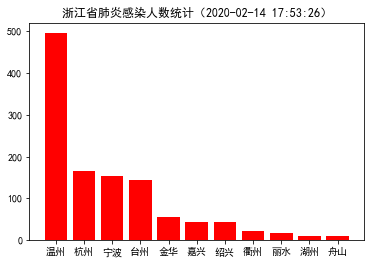

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
%matplotlib inline
fig = plt.figure()
plt.title('浙江省肺炎感染人数统计（'+ str(ptime) +'）')
x=s1.loc[:,'城市']
y=s1.loc[:,'确诊']
plt.bar(x,y,color='r', linewidth=3)
plt.show()

## 4.个性化展示

调用百度语音，播报数据。